<a href="https://colab.research.google.com/github/DavidUpegui/Workshop_ML/blob/main/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Daniel Tabares Pavas & David Upegui Londoño**

#Inicialización

Se importan las librerías necesarias y se importa la data

In [ ]:
#Importación de librerías
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
# Importación de datos
path = 'usuarios-twitter.csv'
data= pd.read_csv(path)

# Columnas del dataframe
data.info()

# Ejemplo de los datos
display(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   usuario    140 non-null    object 
 1   op         140 non-null    float64
 2   co         140 non-null    float64
 3   ex         140 non-null    float64
 4   ag         140 non-null    float64
 5   ne         140 non-null    float64
 6   wordcount  140 non-null    float64
 7   categoria  140 non-null    int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 8.9+ KB


,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


Se extraen 3 variables para trabajar, en este caso se escogen:
- **ex:** Extraversion – grado de timidez, solitario o participación ante el grupo social
- **ne:** Neuroticism, – grado de neuroticismo, nervioso, irritabilidad, seguridad en sí mismo.
- **wordcount:** Cantidad promedio de palabras usadas en sus tweets.

In [ ]:
# Extraer las columnas elegidas para X (ex, ne y wordcount) y la columna de la categoría (y)
X = data[['ex', 'ne', 'wordcount']]  # Características
y = data['categoria']  # Resultado

print(X.head())  # Muestra las primeras filas de X para verificar

          ex         ne  wordcount
0  41.948819   9.841575    37.0945
1  37.938947  10.362406    78.7970
2  38.999896   8.836979    49.2604
3  52.337538   5.032231    80.4538
4  48.530806   7.305968    47.0645


##Implementación del modelo

Se usa el método del codo para encontrar el número óptimo de clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

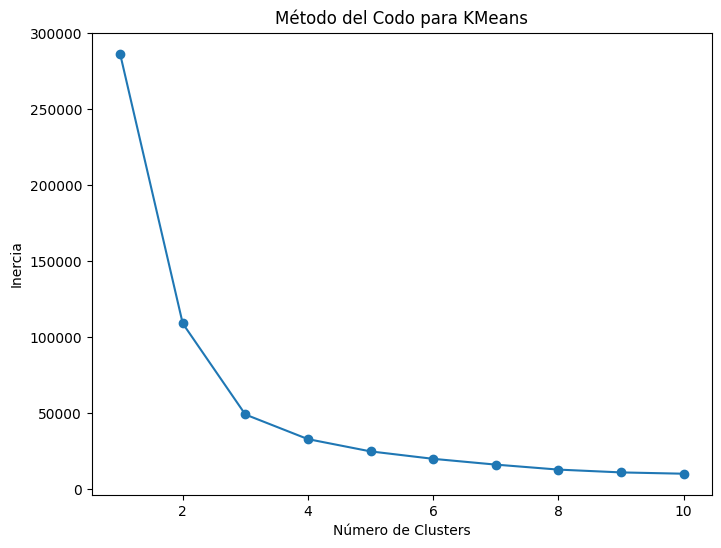

In [ ]:
inertia = []

# Rango de número de clusters que quieres probar
num_clusters = range(1, 11)

for k in num_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 6))
plt.plot(num_clusters, inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo para KMeans')
plt.show()

Según  el método del codo el número óptimo de clusters es 3

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

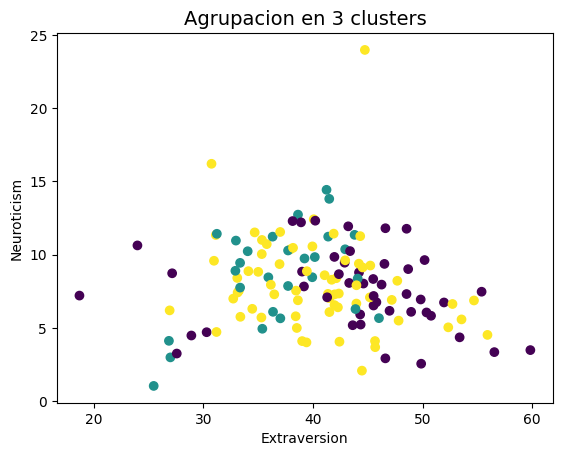

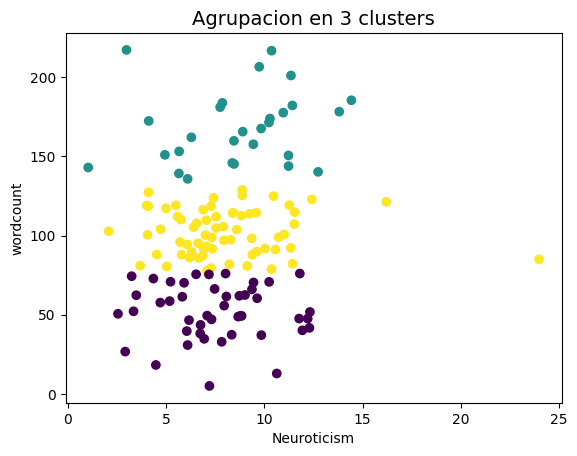

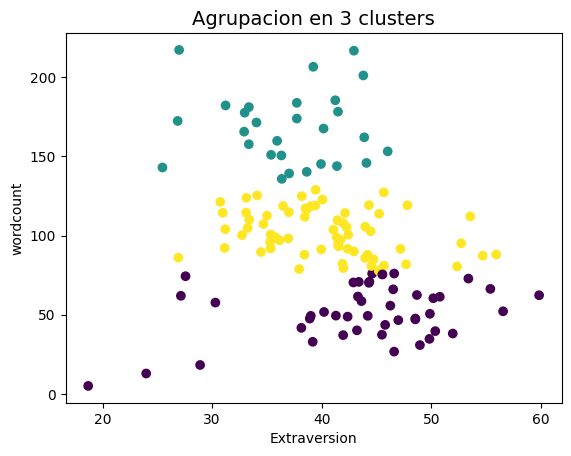

In [ ]:
Y2 = kmeans.predict(X)
plt.figure()
plt.title('Agrupacion en 3 clusters', fontsize=14)
plt.xlabel('Extraversion')
plt.ylabel('Neuroticism')
plt.scatter(X['ex'], X['ne'], c=Y2);
plt.figure()
plt.title('Agrupacion en 3 clusters', fontsize=14)
plt.xlabel('Neuroticism')
plt.ylabel('wordcount')
plt.scatter(X['ne'], X['wordcount'], c=Y2);
plt.figure()
plt.title('Agrupacion en 3 clusters', fontsize=14)
plt.xlabel('Extraversion')
plt.ylabel('wordcount')
plt.scatter(X['ex'], X['wordcount'], c=Y2);


# Interpretación del resultado:
Aparentemente, la característica wordcount tiene mucho peso sobre las demás, por lo cuál, la separación no evidencia una relación con neuroticism y extravesion.

Podemos destacar además que wordount es un dato numérico exacto y verificable, mientras que la extraversión y el neuroticismo dependen de una interpretación o clasificación que puede ser ambigua.

Se podría repetir el experimento con otro grupo de variables que no incluyan wordcount para ver qué tipo de relación existe entre las demás características.

**A continuación se muestra la dispersión real**
En comparación con los resultados obtenidos por el modelo, podemos determinar que los clusters formados no representan las categorías reales

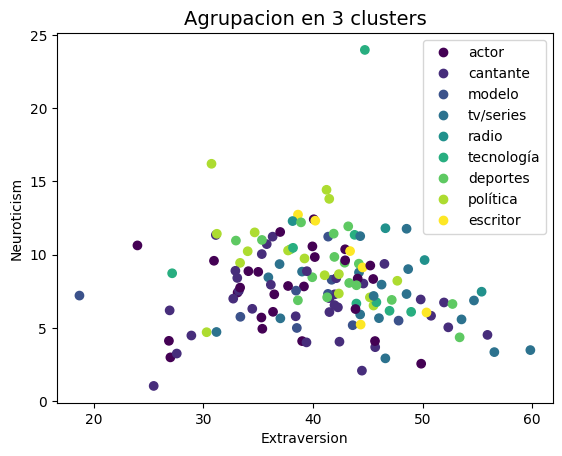

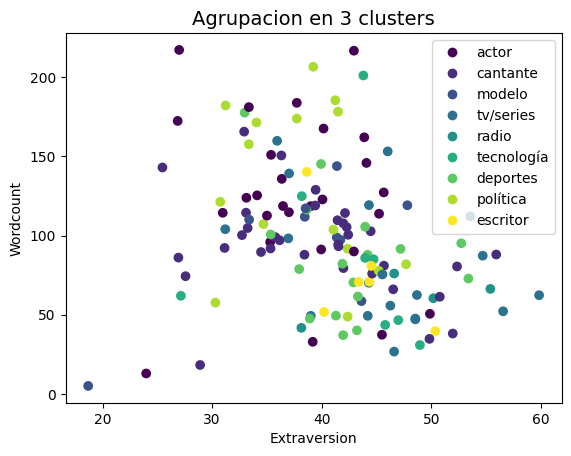

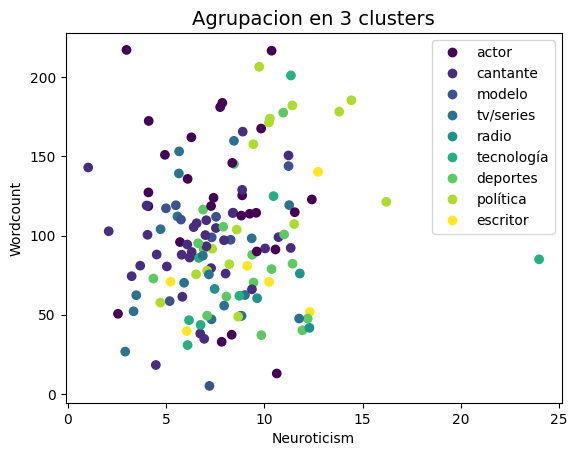

In [ ]:
selected = X.iloc[:10]

plt.figure()
plt.title('Agrupacion en 3 clusters', fontsize=14)
plt.xlabel('Extraversion')
plt.ylabel('Neuroticism')
# Gráfico de dispersión de los puntos con las categorías
scatter = plt.scatter(X['ex'], X['ne'], c=y, label='Categorías')
handles, labels = scatter.legend_elements(prop="colors")
categories = ['actor', 'cantante', 'modelo', 'tv/series', 'radio', 'tecnología', 'deportes', 'política', 'escritor']
# Agregar la leyenda
plt.legend(handles, categories + ['Seleccionados'], loc='upper right')
plt.show()

plt.figure()
plt.title('Agrupacion en 3 clusters', fontsize=14)
plt.xlabel('Extraversion')
plt.ylabel('Wordcount')
# Gráfico de dispersión de los puntos con las categorías
scatter = plt.scatter(X['ex'], X['wordcount'], c=y, label='Categorías')
handles, labels = scatter.legend_elements(prop="colors")
categories = ['actor', 'cantante', 'modelo', 'tv/series', 'radio', 'tecnología', 'deportes', 'política', 'escritor']
# Agregar la leyenda
plt.legend(handles, categories + ['Seleccionados'], loc='upper right')
plt.show()

plt.figure()
plt.title('Agrupacion en 3 clusters', fontsize=14)
plt.xlabel('Neuroticism')
plt.ylabel('Wordcount')
# Gráfico de dispersión de los puntos con las categorías
scatter = plt.scatter(X['ne'], X['wordcount'], c=y, label='Categorías')
handles, labels = scatter.legend_elements(prop="colors")
categories = ['actor', 'cantante', 'modelo', 'tv/series', 'radio', 'tecnología', 'deportes', 'política', 'escritor']
# Agregar la leyenda
plt.legend(handles, categories + ['Seleccionados'], loc='upper right')
plt.show()